# CPPI(Constant Proportional Protfolio Insurance)

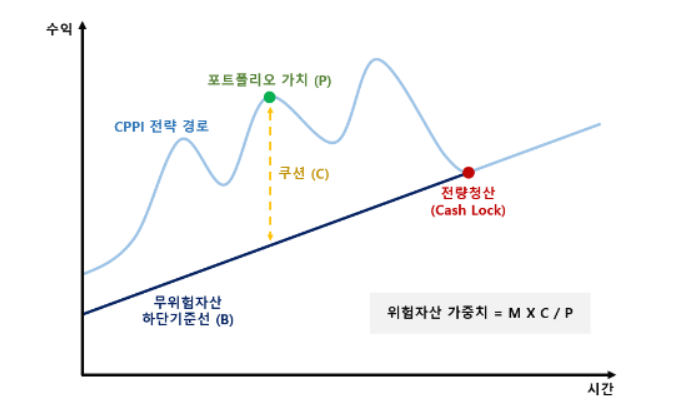

플로어(floor): 투자자가 감수할 수 있는 최대 손실 금액  
쿠션(cushion): 현재 포트폴리오 가치와 플로어 가치 간의 차이(CPPI - F)
멀티플라이어(multiplier): 쿠션 금액에 곱하여 위험 자산(예: 주식)에 투자할 금액을 결정하는 배수  


위험 자산 투자 금액 = Cushion * Multiplier  

- 포트폴리오 가치에서 위험 자산 투자 금액을 뺀 나머지 금액은 안전 자산에 투자  
- 위험 자산에 투자하는 금액이 포트폴리오 가치를 넘을 경우에는 100% 위험 자산에 투자  
- floor와 포트폴리오 가치가 동일하게 되면 안전자산에 100% 투자  


※ 갭 리스크(Gap Risk)  
갑작스럽게 큰 변동이 일어남으로 인해 포트폴리오의 가치가 floor 밑으로 떨어질 수 잇음.-> 매커니즘에 오류 발생  
- M값에 따라 포트폴리오 가치의 최대 하락폭(1/M)이 결정됨. 예를들어 M=6인데 위험자산이 20%감소했다면 1/6 < 0.2 이므로 floor 위반  



[*********************100%%**********************]  1 of 1 completed


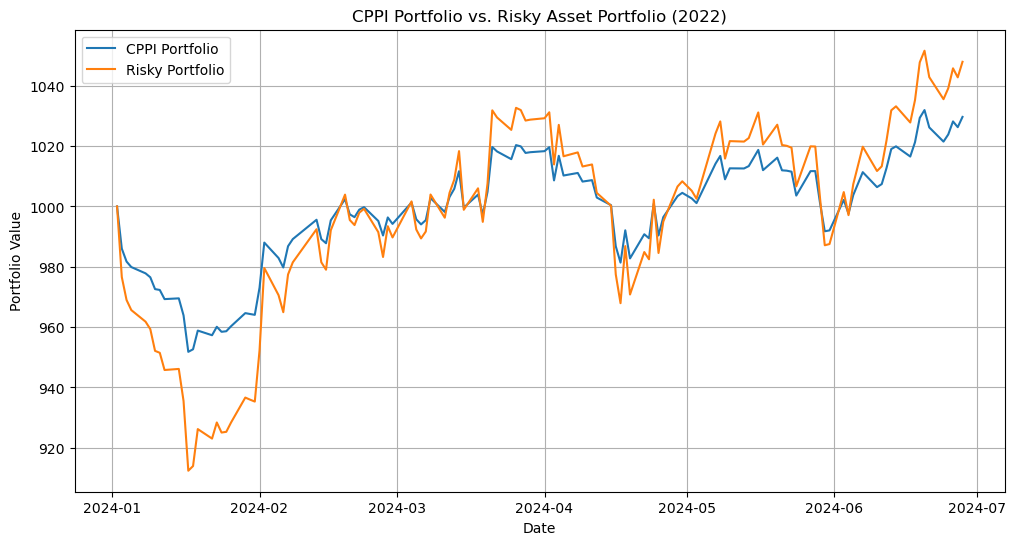

In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

m = 3
initial_asset = 1000
floor = 0.8 * initial_asset
risk_free_asset = 0.036
daily_risk_free_rate = (1+risk_free_asset)**(1/252) - 1

risky_asset = yf.download('^KS11', start = '2024-01-01', end = '2024-07-01')
risky_asset['Return'] = risky_asset['Adj Close'].pct_change().fillna(0)


cppi_portfolio = [initial_asset]
Risky_portfolio = [initial_asset]

for i in range(1,len(risky_asset)):
    previous_value = cppi_portfolio[-1]
    cushion = previous_value - floor
    risky_allocation = m * cushion
    rf_allocation = previous_value - risky_allocation
    
    risky_return = risky_asset['Return'].iloc[i]
    risky_value = risky_allocation * (1+risky_return)
    rf_value = rf_allocation * (1+daily_risk_free_rate)
    new_value = risky_value + rf_value
    Risky_new_value = Risky_portfolio[-1] * (1 + risky_return)
    
    cppi_portfolio.append(new_value)
    Risky_portfolio.append(Risky_new_value)
    

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(risky_asset.index, cppi_portfolio, label='CPPI Portfolio')
plt.plot(risky_asset.index, Risky_portfolio, label='Risky Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('CPPI Portfolio vs. Risky Asset Portfolio (2022)')
plt.legend()
plt.grid(True)
plt.show()    
    